## Intégrale du carré du module : Energie et Puissance d'un signal
### Energie d'un signal
Par définition, **l’énergie** d’un signal continu $x(t)$ réel ou complexe est :

$${\text E} = \int_{t=-\infty}^{\infty} x(t) x^*(t) dt = \int_{t=-\infty}^{\infty} |x(t)|^2 dt $$

<ol>
<li>$x^*(t)$ est le complexe conjugué de $x(t)$;

<li>$|x(t)$|  est le module du signal $x(t)$.
</ol>

<ul>
<li> Si ${\text E}$  est fini on dit que le signal $x(t)$ est à énergie finie, c'est un **signal d'énergie**; </li>

<li> L’énergie se mesure en Joules</li>

<li> La **puissance instantanée** de $x(t)$ est 
   <ul>
      <li> $$ p(t) = x(t) x^*(t)  ;$$ </li>
      <li> C'est la densité d'énergie : $$p(t) = \frac{d{\text E}}{dt}$$ .</li>
   </ul>
</li>
 
</ul>
### Puissance moyenne d'un signal
Soit un signal $x(t)$  sa **puissance moyenne** est définie par :

$$\mbox{P} = \lim_{T \rightarrow \infty} \frac{1}{T} \int_{-T/2}^{T/2} x(t) x^*(t) dt$$

Si $\mbox{E}$ est infini et que $\mbox{P}$, on a un **signal de puissance**.



## Fonction d'autocorrélation

La fonction d'autocorrélation d'un signal d'énergie $x(t)$ est définie par :

$$\mbox{R}_{xx}(\tau) = \int_{t=-\infty}^{\infty} x(t) x^*(t-\tau) dt$$

On note que $\mbox{R}_x(0) = \mbox{E}$.

Dans le cas d'un signal de puissance, l'intégrale précédente diverge et on définit :

$$\mbox{R}_{xx}(\tau) = \lim_{T \rightarrow \infty} \frac{1}{T} \int_{-T/2}^{T/2} x(t) x^*(t-\tau) dt$$

On note que $\mbox{R}_x(0) = \mbox{P}$.

In [1]:
import scipy.integrate
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML, display
from ipywidgets import interact



def showCorrelation(f1, f2, tau):
    # Calculate the overall correlation result using Simpson integration
    correlation = np.zeros(len(t))
    for n, tau_ in enumerate(t):
        prod = lambda  tau: f1(t) * f2(t-tau_)
        correlation[n] = scipy.integrate.simps(prod(tau_), t)
    
    # Create the shifted  function
    f_shift = lambda tau: f2(t-tau)
    prod = lambda tau: f1(t) * f2(t-tau)

    # Plot the curves
    plt.gcf().clear()
    
    plt.subplot(211)
    plt.gca().set_ymargin(0.05)
    plt.plot(t, f1(t), label=r'$f_1(t)$')
    plt.plot(t, f_shift(tau), label=r'$f_2(t-\tau)$')
    plt.fill(t, prod(tau), color='r', alpha=0.5, edgecolor='black', hatch='//')
    plt.plot(t, prod(tau), 'r-', label=r'$f_1(t)f_2(t-\tau)$')
    plt.grid(True); plt.xlabel(r't'); plt.ylabel(r'$x(t)$')
    plt.legend(fontsize=10)
    plt.text(-4, 0.6, r'$\tau=%.2f$' % tau, bbox=dict(fc='white'))
    
    # plot the correlation curve
    plt.subplot(212)
    plt.gca().set_ymargin(0.05)
    plt.plot(t, correlation, label=r'$R_{f_1,f_2}(\tau)$')
    
    # recalculate the value of the convolution integral at the current time-shift t0
    current_value = scipy.integrate.simps(prod(tau), t)
    plt.plot(tau, current_value, 'ro')  # plot the point
    plt.grid(True); plt.xlabel(r'$\tau$'); plt.ylabel(r'$R_{f_1,f_2}(\tau)$')
    plt.legend(fontsize=10)
    plt.show()


### Exemple d'autocorrélation pour 2 signaux rectangulaires :

Ci-dessous un exemple d'autocorrélation pour 2 signaux rectangulaires : faites varier $\tau$.  Reliez le résultat numérique au résultat analytique.

In [2]:
resolution = 0.01
t = np.arange(-3,5,resolution)
import matplotlib; matplotlib.rcParams['figure.figsize'] = (8,6)



f1 = lambda t: (abs(t)<0.5).astype(float)
f2 = lambda t: (abs(t)<0.5).astype(float)
    
#f1 = lambda t: np.maximum(0, 1-abs(t))
#f2 = lambda t: np.maximum(0, 1-abs(t))

plt.figure()
interact(lambda tau: showCorrelation(f1, f2, tau), tau = (-2,3,0.05));

Widget Javascript not detected.  It may not be installed or enabled properly.


### Exemple d'autocorrélation pour 2 signaux triangulaires :

Ci-dessous un exemple d'autocorrélation pour 2 signaux triangulaires : faites varier $\tau$.  Quelle est la forme de la corrélation (quelle puissance de $x(t)$ si $x(t) = f_1(t)=f_2(t)$ ?).


In [3]:
#f1 = lambda t: (abs(t)<0.5).astype(float)
#f2 = lambda t: (abs(t)<0.5).astype(float)
    
f1 = lambda t: np.maximum(0, 1-abs(t))
f2 = lambda t: np.maximum(0, 1-abs(t))

plt.figure()
interact(lambda tau: showCorrelation(f1, f2, tau), tau = (-2,3,0.05));

Widget Javascript not detected.  It may not be installed or enabled properly.


## Propriétés de la fonction d'autocorrélation

<ol>
<li> ** La fonction d'autocorrélation a une symétrie Hermitienne** <br> <br>

De par la définition, on a directement que :
 $$R_{xx}(\tau) = R_{xx}^*(-\tau)$$
 
 Dans le cas de signaux réels on a une symétrie pure et simple : 
 $$R_{xx}(\tau) = R_{xx}(-\tau)$$
</li>

En particulier, pour un signal non nul :

<li> ** $\mathbf{R_{xx}(0) > 0}$** <br><br>
Cette propriété indique que l'énergie et/ou la puissance sont positives.

</li>
<li> ** Inégalité de Schwartz ** <br><br>

On peut définir la corrélation entre $x(t)$ et $y(t)$ comme étant un produit scalaire $\displaystyle <x,y_\tau> = \int_{-\infty}^{\infty} x(t) y(t-\tau) dt$.


Alors, l'inégalité de Schwartz nous indique que $$|<x,y_\tau>|^2 \qquad \leq \qquad<x,x> . <y_\tau,y_\tau>,$$ donc :

$$|R_{xy}(\tau)|^2 \leq R_{xx}(0) R_{yy}(0).$$

En particulier :

$$|R_{xx}(\tau)| \leq R_{xx}(0).$$

<br>
et donc, dans le cas réel $R_{xx}(0)$ ** est la valeur maximale de la fonction d'autocorrélation **


</li>


</ol>

## Fonction d'intercorrélation

La fonction d'intercorrélation de deux signaux d'énergie $x(t)$ et $y(t)$ est définie par :

$$\mbox{R}_{xy}(\tau) = \int_{t=-\infty}^{\infty} x(t) y^*(t-\tau) dt$$



Dans le cas de signaux de puissance, l'intégrale précédente diverge et on définit :

$$\mbox{R}_{xy}(\tau) = \lim_{T \rightarrow \infty} \frac{1}{T} \int_{-T/2}^{T/2} x(t) y^*(t-\tau) dt$$

### Exemple d'intercorrélation entre un signal triangulaire et un signal rectangulaire

Quelle est la forme analytique de la corrélation entre $x(t) = f_1(t)$ et $y(t) = f_2(t)$ ?


In [4]:
f1 = lambda t: (abs(t)<0.5).astype(float)
#f2 = lambda t: (abs(t)<0.5).astype(float)
    
#f1 = lambda t: np.maximum(0, 1-abs(t))
f2 = lambda t: np.maximum(0, 1-abs(t))

plt.figure()
interact(lambda tau: showCorrelation(f1, f2, tau), tau = (-2.5,2.5,0.05));

Widget Javascript not detected.  It may not be installed or enabled properly.


## Application de l'intercorrélation à la détection de signal

Un des intérêts principaux de l'intercorrélation est de pouvoir détecter un signal connu dans un bruit.  L'exemple typique est le SONAR : un signal est envoyé sur une cible, la cible renvoie le signal qui est retardé (appelons $\tau$ le retard, atténué puis affecté de bruit.

Si $x(t)$ est le signal envoyé, le signal reçu est alors :

$$y(t) = A x(t-\tau) + n(t),$$

où $A$ est l'atténuation, $\tau$ le délai et $n(t)$ le bruit.

### Exemple

Dans l'exemple ci-dessous, le signal $x(t)$ est retardé d'une seconde, puis atténué et affecté d'un bruit additif Gaussien.

Les trois signaux sont tracés.  

Ensuite, on trace la corrélation : on voit clairement qu'on obtien un pic de corrélation en $\tau = -1$, ce qui veut dire que cette corrélation est maximale quand le signal $y(t)$ est avancé de une seconde.

On a donc bien, malgré un signal qui est apparemment "noyé dans le bruit" :
<ol>
<li> Détecté le signal, grâce à la corrélation (voir la forme de $R_{xy}(\tau)$) </li>
<li> Déterminé (grâce à la détermination du maximum de la corrélation), le retard $\tau$, parfois appelé temps de vol, qui permet également de déterminer, via la connaissance de la vitesse de l'onde, la distance entre le SONAR et la cible.</li>
</ol>

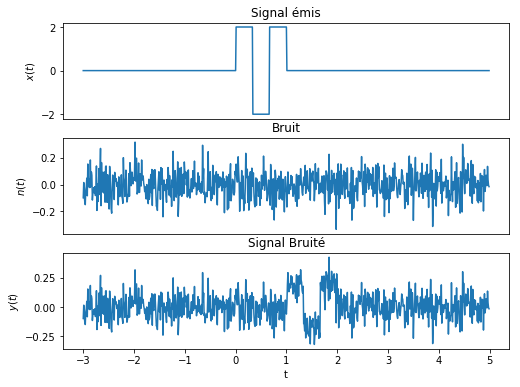

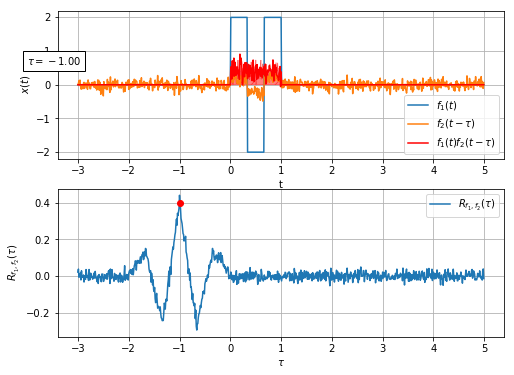

Puissance calculée du Signal :  0.03890000000000002
Puissance calculée du bruit :  0.008725208449538533
Rapport Signal/Bruit -4.10050398674292 dB


/anaconda/lib/python3.6/site-packages/scipy/signal/signaltools.py:492: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()
/anaconda/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/anaconda/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))
/anacond

In [5]:
import scipy.signal as signal
A=0.10;
N=0.1;
tau=1.0;
t=np.arange(-3,5,resolution)
ts=np.arange(0,1,resolution)
n = lambda t,N: np.random.normal(0, N, np.prod(t.shape))
x = lambda t: np.sign(t)-2*np.sign(t-0.33)+2*np.sign(t-0.66)-np.sign(t-1.0)
y = lambda t,N,A : A*x(t-tau)+n(t,N)
yc = lambda t : A*x(t-tau)+n(t,N)
SIGNAL=x(t)
BRUIT=n(t,N)
RECU=A*x(t-tau)+BRUIT
plt.subplot(3,1,1)
plt.plot(t,SIGNAL)
plt.title('Signal émis')
plt.ylabel(r'$x(t)$')
plt.xticks([])
plt.subplot(3,1,2)
plt.title('Bruit')
plt.plot(t,BRUIT)
plt.ylabel(r'$n(t)$')
plt.xticks([])
plt.subplot(3,1,3)
plt.plot(t,RECU)
plt.xlabel('t')
plt.ylabel(r'$y(t)$')
plt.title('Signal Bruité')
plt.figure()
showCorrelation(x,yc,-tau)
CORR=signal.correlate(SIGNAL,RECU,'full')
plt.figure()
plt.plot(CORR)
S=np.sum((A*x(ts))**2)/np.prod(ts.shape)
print('Puissance calculée du Signal : ' , S)
Ns=np.sum(n(ts,N)**2)/np.prod(ts.shape)
print('Puissance calculée du bruit : ' , Ns)
print('Rapport Signal/Bruit' ,10*np.log10(S/N), 'dB')

### Exemple du SONAR

On caractérise régulièrement le rapport Signal/Bruit comme étant le rapport entre la puissance du signal et la puissance du bruit.

En nous limitant à la durée du signal (1 seconde), déterminez la puissance de la partie signal de $y(t)$ (A $x(t)$) et la puissance du Bruit (ici, on a un bruit Gaussien de variance $N^2$).

On exprime en général ce rapport Signal/Bruit en décibel :

$$\mbox{SNR} = 10 * \log_{10} \frac{S}{N}$$

Sur l'animation ci-dessous, faites varier les valeurs de $A$ et $N$ pour observer la fonction de corrélation résultante.  Notez que pour les mêmes valeurs de $A$ et $N$, vous pouvez avoir des résultats significativement différents.  En effet, à chaque fois, la réalisation du bruit est différente.



In [6]:
import scipy.signal as signal
def playCorr(A,N,tau):
    SIGNAL=x(t)
    BRUIT=n(t,N)
    RECU=A*x(t-tau)+BRUIT
    ts=np.arange(0,1,resolution)
    S=np.sum((A*x(ts))**2)/np.prod(ts.shape)
    print('Puissance Mesurée du Signal : ' , S)
    Ns=np.sum(BRUIT**2)/np.prod(t.shape)
    print('Puissance Mesurée du bruit : ' , Ns)
    print('Rapport Signal/Bruit' ,10*np.log10(S/Ns), 'dB')
    CORR=signal.correlate(SIGNAL,RECU,'full')
    LENGTH=np.prod(SIGNAL.shape)
    OFFSET=LENGTH
    TT=np.arange((OFFSET-LENGTH//2),(OFFSET+LENGTH//2))
    TAU=np.arange(-(LENGTH*resolution)//2,(LENGTH*resolution)//2,resolution)
    plt.subplot(2,1,1)
    plt.plot(TAU,CORR[TT])
    plt.xlabel(r'$\tau$')
    plt.ylabel(r'$R_{xy}(\tau)$')
    plt.title('Fonction d\'intercorrélation pour un SNR de '+str(int(10*np.log10(S/Ns)*100)/100)+' dB')
    plt.subplot(2,1,2)
    plt.xlabel('$t$')
    plt.ylabel('$y(t)$')
    plt.title('Signal bruité')
    plt.plot(t,RECU)
    plt.plot(t,x(t-tau))
    plt.show()
    
interact(lambda A,N,tau: playCorr(A,N,tau), A = (1,5,1), N = (0.1,10,0.1),tau=(-2
                                                                               ,2,0.5));

Widget Javascript not detected.  It may not be installed or enabled properly.
